In [74]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [75]:
data=pd.read_csv("iph.csv")
data["Date"]=data["Date"].map(lambda ligne:ligne.replace("M","-0")+"-01" if len(ligne)==6 else ligne.replace("M","-")+"-01")
data.drop(["indices","Unit","ippi-ihpi"],axis=1,inplace=True)
data["Date"]=pd.to_datetime(data["Date"])
data.set_index("Date",inplace=True)
data

,Value
Date,
2015-01-01,108.741744
2015-02-01,97.370955
2015-03-01,116.814881
2015-04-01,108.182840
2015-05-01,113.348600
...,...
2023-04-01,127.621628
2023-05-01,136.571718
2023-06-01,129.804821


In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 104 entries, 2015-01-01 to 2023-08-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   104 non-null    float64
dtypes: float64(1)
memory usage: 1.6 KB


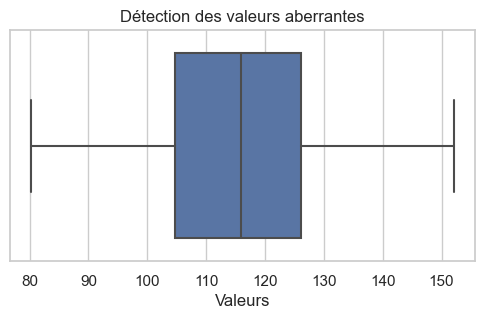

In [105]:
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(6, 3))
sns.boxplot(x=data["Value"])
plt.title('Détection des valeurs aberrantes')
plt.xlabel('Valeurs')
plt.show()

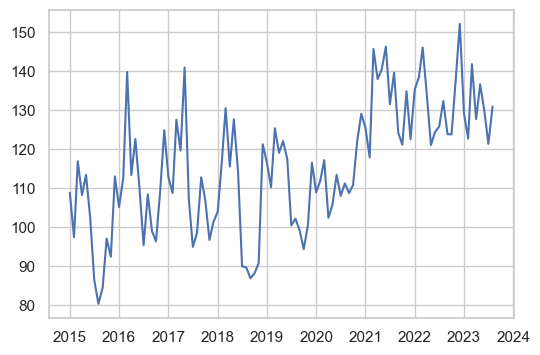

In [108]:
plt.figure(figsize=(6, 4))
plt.plot(data)

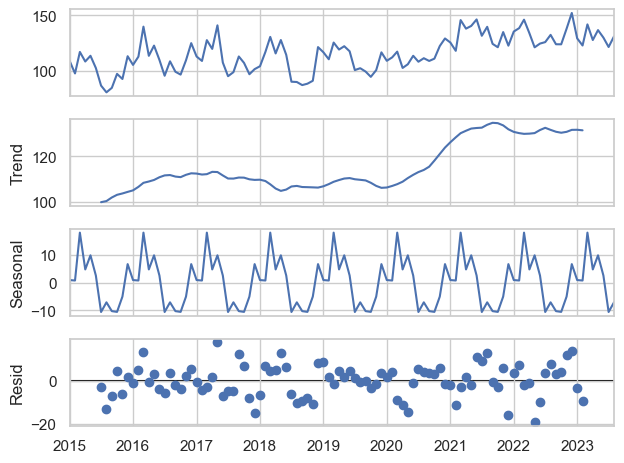

In [79]:
result=seasonal_decompose(data, model='additive').plot()

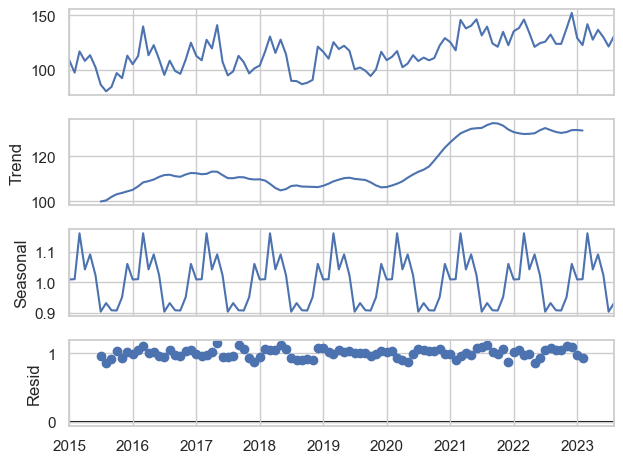

In [80]:
result=seasonal_decompose(data, model='multiplicatif').plot()

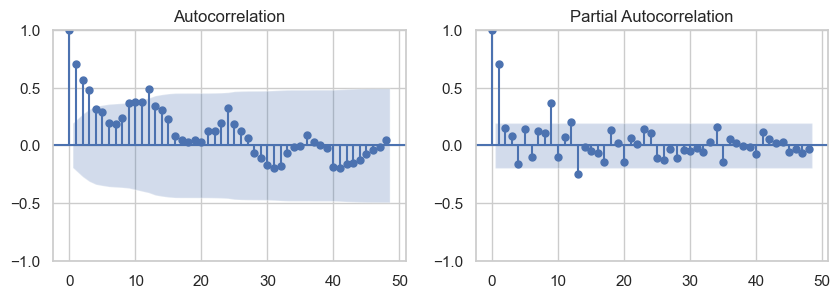

In [81]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))
plot_acf(data,lags=48, ax=ax1)
plot_pacf(data,lags=48, ax=ax2)
# Affichage de la figure
plt.show()

In [82]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(data.Value)
print('Statistique ADF :', result[0])
print('p-value :', result[1])

Statistique ADF : -1.1027107585242857
p-value : 0.7139896761599561


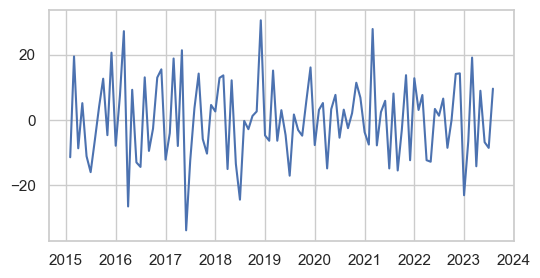

In [116]:
diff=data.diff().dropna()
plt.figure(figsize=(6,3))
plt.plot(diff)

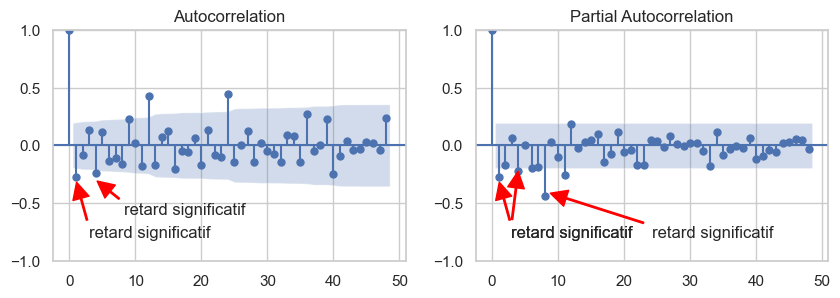

In [84]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))
plot_acf(diff,lags=48, ax=ax1)
plot_pacf(diff,lags=48, ax=ax2)
lags_significatifsMA = [1,4]

ax1.annotate('retard significatif', xy=(1, -0.3), xycoords='data', xytext=(0.1,0.1), textcoords='axes fraction', arrowprops=dict(color='red', shrink=0.05, width=1))

ax1.annotate('retard significatif', xy=(4, -0.3), xycoords='data', xytext=(0.2,0.2), textcoords='axes fraction', arrowprops=dict(color='red', shrink=0.05, width=1))


ax2.annotate('retard significatif', xy=(1, -0.3), xycoords='data', xytext=(0.1,0.1), textcoords='axes fraction', arrowprops=dict(color='red', shrink=0.05, width=1))

ax2.annotate('retard significatif', xy=(4, -0.2), xycoords='data', xytext=(0.1,0.1), textcoords='axes fraction', arrowprops=dict(color='red', shrink=0.05, width=1))

ax2.annotate('retard significatif', xy=(8, -0.4), xycoords='data', xytext=(0.5,0.1), textcoords='axes fraction', arrowprops=dict(color='red', shrink=0.05, width=1))


# Affichage de la figure
plt.show()

In [117]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(diff.Value)
print('Statistique ADF :', result[0])
print('p-value :', result[1])

Statistique ADF : -3.9766925616124325
p-value : 0.0015375954238151836


In [118]:
train_set=data[:90]
test_set=data[90:]

In [120]:
import pmdarima as pm 
pm.auto_arima(train_set,seasonal=True,m=12,d=1,D=0,test='adf',
                     trace=True)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=703.067, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=677.668, Time=0.08 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=685.973, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=701.085, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=698.437, Time=0.04 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=668.598, Time=0.16 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=670.591, Time=0.32 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=670.545, Time=0.16 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=670.427, Time=0.14 sec
 ARIMA(2,1,0)(2,0,0)[12] intercept   : AIC=667.641, Time=0.25 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=675.397, Time=0.13 sec
 ARIMA(2,1,0)(2,0,1)[12] intercept   : AIC=669.443, Time=0.37 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=668.631, Time=0.21 sec
 ARIMA(3,1,0)(2,0,0)[12] intercept   

ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(2, 0, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [122]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train_set, order=(1, 1, 1), seasonal_order=(2, 0, 0, 12))
result = model.fit()
print(result.summary())


                                      SARIMAX Results                                      
Dep. Variable:                               Value   No. Observations:                   90
Model:             SARIMAX(1, 1, 1)x(2, 0, [], 12)   Log Likelihood                -324.587
Date:                             Tue, 19 Dec 2023   AIC                            659.173
Time:                                     21:45:31   BIC                            671.617
Sample:                                 01-01-2015   HQIC                           664.189
                                      - 06-01-2022                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6024      0.122      4.933      0.000       0.363       0.842
ma.L1         -0.9261      

C:\Users\papew\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\papew\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


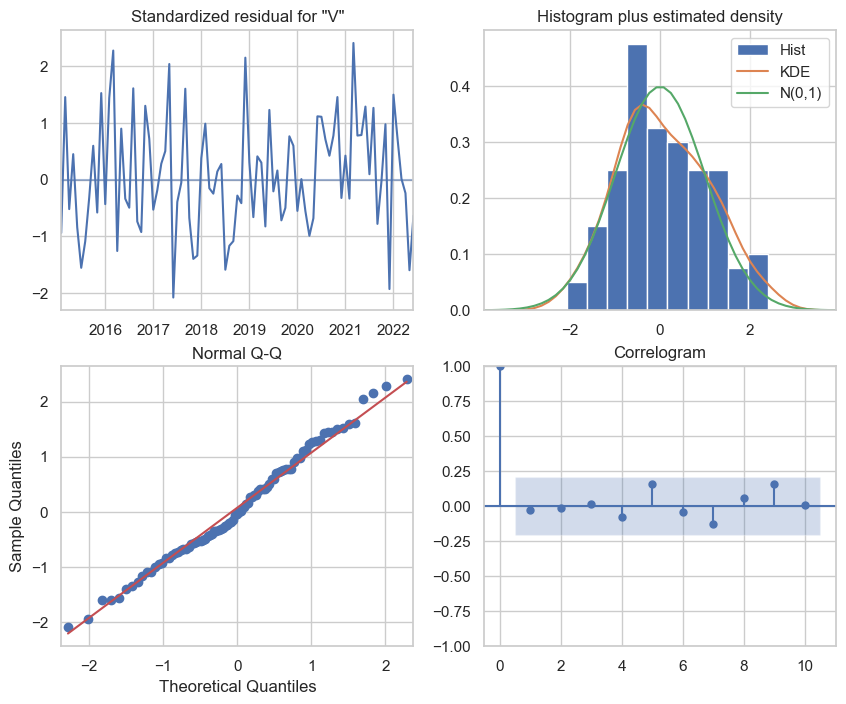

In [123]:

result.plot_diagnostics().set_size_inches(10, 8)   
plt.show()

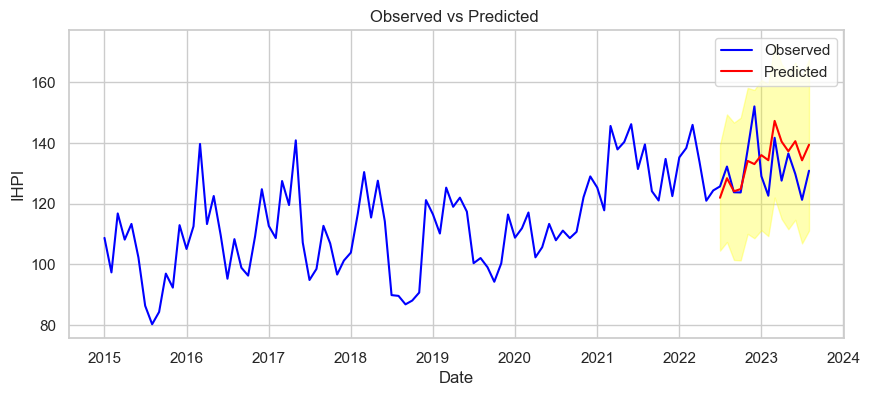

In [124]:


# Prédictions pour les données de test
forecast = result.get_forecast(steps=len(test_set))
predicted = forecast.predicted_mean
confint = forecast.conf_int()

plt.figure(figsize=(10, 4))
plt.plot(data, label='Observed', color='blue')  # Utilisation des données complètes pour les observations
plt.plot(test_set.index, predicted, label='Predicted', color='red')  # Prédictions pour les données de test
plt.fill_between(test_set.index, confint.iloc[:, 0], confint.iloc[:, 1], color='yellow', alpha=0.3)

plt.xlabel('Date')
plt.ylabel('IHPI')
plt.title('Observed vs Predicted ')
plt.legend()
plt.grid(True)
plt.show()


In [125]:
tableau = pd.concat([test_set,predicted],axis=1)
tableau["erreur"]=tableau["predicted_mean"]-tableau["Value"]
tableau["erreurabsolu"]=abs(tableau["erreur"])
tableau["squarederror"]=tableau["erreur"].map(lambda val:val**2)
tableau["ratioErreur"]=tableau["erreurabsolu"]/tableau["Value"]
MAD=tableau["erreurabsolu"].mean()
MSE=tableau["squarederror"].mean()
Mape=tableau["ratioErreur"].mean()

performance_df = pd.DataFrame({
    'Métrique': ['MAD', 'MSE', 'Mape'],
    'Ensemble de test': [MAD,MSE,Mape]
})
tableau

,Value,predicted_mean,erreur,erreurabsolu,squarederror,ratioErreur
2022-07-01,125.716038,121.972810,-3.743227,3.743227,14.011751,0.029775
2022-08-01,132.268702,128.427416,-3.841286,3.841286,14.755476,0.029042
2022-09-01,123.784622,124.104477,0.319855,0.319855,0.102307,0.002584
2022-10-01,123.730712,124.848159,1.117448,1.117448,1.248689,0.009031
2022-11-01,137.826682,134.134696,-3.691986,3.691986,13.630764,0.026787
2022-12-01,152.092380,133.075027,-19.017353,19.017353,361.659697,0.125038
2023-01-01,129.108219,136.036581,6.928363,6.928363,48.002211,0.053663
2023-02-01,122.652648,134.352403,11.699755,11.699755,136.884261,0.095389
2023-03-01,141.750052,147.320239,5.570187,5.570187,31.026980,0.039296
2023-04-01,127.621628,140.496885,12.875257,12.875257,165.772238,0.100886


In [126]:
performance_df


,Métrique,Ensemble de test
0,MAD,7.283372
1,MSE,81.995264
2,Mape,0.055227
